In [3]:
import pandas as pd
import numpy as np
import os

import regex as re
import altair as alt

from datetime import datetime
from datetime import timedelta


FileNotFoundError: [Errno 2] No such file or directory: 'CEWS_with_subset_labels.csv'

In [ ]:
"This is Eric's first attempt at data exploration and visualization. Nothing from this was actually used in the report."

In [6]:
os.chdir('..')
os.getcwd()

'C:\\Users\\ebaxt\\Documents\\Masters\\capstone\\w2020-data599-capstone-projects-statistics-canada-covid-19'

In [7]:
cews = pd.read_csv("CEWS_with_subset_labels.csv")
# First column is just the index again
cews = cews.drop("Unnamed: 0", axis = 1)
# Datetime
cews.Period = pd.to_datetime(cews.Period, infer_datetime_format=True)

# Other Data

gdpByIndustry = pd.read_csv("more_data/gdpByIndustry.csv")
gdpByProv = pd.read_csv("more_data/gdpByProvince.csv")
popByProv = pd.read_csv("more_data/popByProv.csv", encoding = "ISO-8859-1")
popByCity = pd.read_csv("more_data/popByCity.csv", encoding = "ISO-8859-1")

# Part 1: Total Subsidies By Timeframe

In [8]:
temp = cews.query("GeoAggregation == 'Canada'and IndustryAggregation == 'All industries'")
temp

,Period,RegionCode,Region,GeographicClassification,CensusLevel,IndustryCode,Industry,BusinessLocations,Subsidy,SupportedEmployees,RehiredEmployees,GeoAggregation,IndustryAggregation
71050,2020-03-15,TOTAL,Canada,Not applicable,Not applicable,TOTAL,All Industries,294070.0,7.459996e+09,3489214.0,30520.0,Canada,All industries
148158,2020-04-12,TOTAL,Canada,Not applicable,Not applicable,TOTAL,All Industries,336595.0,9.111729e+09,3743506.0,38945.0,Canada,All industries
225118,2020-05-10,TOTAL,Canada,Not applicable,Not applicable,TOTAL,All Industries,331865.0,9.647710e+09,4011166.0,44420.0,Canada,All industries
296787,2020-06-07,TOTAL,Canada,Not applicable,Not applicable,TOTAL,All Industries,291545.0,8.695346e+09,3836158.0,36460.0,Canada,All industries
368516,2020-07-05,TOTAL,Canada,Not applicable,Not applicable,TOTAL,All Industries,288945.0,7.495102e+09,4322785.0,25855.0,Canada,All industries
438015,2020-08-02,TOTAL,Canada,Not applicable,Not applicable,TOTAL,All Industries,272555.0,6.724693e+09,4163167.0,19510.0,Canada,All industries
503335,2020-08-30,TOTAL,Canada,Not applicable,Not applicable,TOTAL,All Industries,240720.0,3.850675e+09,3768917.0,16345.0,Canada,All industries
562275,2020-09-27,TOTAL,Canada,Not applicable,Not applicable,TOTAL,All Industries,202310.0,2.618872e+09,3154474.0,12620.0,Canada,All industries


We see that over the 8 timeframes available in this dataset, a total of \$55.6 billion has been given out in subsidies. 

The most was given out in the May 2020 period, and the least in the September 2020 period.

In [11]:
alt.Chart(temp, title = "Total Subsidies Given in Each Time Period").mark_bar().encode(
    x = "Period",
    y = "Subsidy"
)

alt.Chart(...)

In [13]:
#Cumulative subsidies
temp["Cumulative Subsidies"] = temp["Subsidy"].cumsum()
temp
alt.Chart(temp, title = "Cumulative Total Subsidies Given Over Time").mark_line().encode(
    x = "Period",
    y = "Cumulative Subsidies"
)

<ipython-input-13-1b94d3a54246>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["Cumulative Subsidies"] = temp["Subsidy"].cumsum()


alt.Chart(...)

# Part 2: Total Subsidies Given to Each Level 1 Industry 

In [14]:
temp2 = cews.query("GeoAggregation == 'Canada'and IndustryAggregation == 'Level 1'")
temp2 = temp2.groupby(["Industry"]).sum().sort_values("Subsidy").reset_index()

alt.Chart(temp2).mark_bar().encode(
    y = "Industry",
    x = "Subsidy"
)

temp2.sort_values("Subsidy")

,Industry,BusinessLocations,Subsidy,SupportedEmployees,RehiredEmployees
0,Utilities,810.0,8.841700e+07,32823.0,25.0
1,Finance and insurance,33720.0,5.681380e+08,282642.0,1585.0
2,"Agriculture, forestry, fishing and hunting",33715.0,6.772610e+08,349582.0,1405.0
3,Educational services,37925.0,7.620590e+08,432990.0,4095.0
4,Real estate and rental and leasing,56510.0,9.099780e+08,458136.0,3760.0
5,"Arts, entertainment and recreation",54705.0,1.226016e+09,810533.0,5575.0
6,Information and cultural industries,51500.0,1.360190e+09,737673.0,3765.0
7,"Mining, quarrying, and oil and gas extraction",16685.0,1.588199e+09,598705.0,950.0
8,Management of companies and enterprises,14165.0,1.768304e+09,802643.0,1260.0
9,"Administrative and support, waste management a...",94610.0,2.709832e+09,1707626.0,8295.0


In [18]:
alt.Chart(temp2, title = "Total Supported Emplyees in Each Industry").mark_bar().encode(
    y = "Industry",
    x = "SupportedEmployees"
)

alt.Chart(...)

We see that the most subsidized industry under the CEWS program is manufacturing with \\$10,000,000,000 in subsidies in this 8 month period. 47 million employees were supported in this industry over the course of the 8 months. Note however, that many of these emplyees will have been counted multiple times.

Followed by construction with \\$6.4 billion, and "Accomidation and Food Services" with \\$4.3 billion.

In [20]:
# This will only be useful if subset to a couple industries

temp2 = cews.query("GeoAggregation == 'Canada'and IndustryAggregation == 'Level 1'")

alt.Chart(temp2, title = "Total Subsidies by Period and Industry").mark_bar().encode(
    x = "Period",
    y = "Subsidy",
    color = "Industry"
)

alt.Chart(...)

# Part 3: Total Subsidies Given to each Province

In [21]:
temp3 = cews.query("GeoAggregation == 'Province'and IndustryAggregation == 'All industries'").\
    groupby("Region").sum().reset_index()

temp3

,Region,BusinessLocations,Subsidy,SupportedEmployees,RehiredEmployees
0,Alberta,298590.0,8.929935e+09,4459116.0,27285.0
1,British Columbia,340110.0,6.898186e+09,3853463.0,35115.0
2,Manitoba,59060.0,1.392547e+09,829931.0,5310.0
3,New Brunswick,44685.0,8.806740e+08,513708.0,3745.0
4,Newfoundland and Labrador,29775.0,5.687260e+08,322451.0,2700.0
5,Northwest Territories,2245.0,8.220900e+07,34050.0,150.0
6,Nova Scotia,54420.0,1.030954e+09,620441.0,5190.0
7,Nunavut,835.0,3.924300e+07,18071.0,25.0
8,Ontario,850145.0,2.196147e+10,12026127.0,86045.0
9,Prince Edward Island,11280.0,1.956170e+08,120130.0,985.0


In [23]:
alt.Chart(temp3, title = "Total Subsidies per Province").mark_bar().encode(
    x = "Subsidy",
    y = "Region"
)

alt.Chart(...)

In [24]:
# Over time
temp3 = cews.query("GeoAggregation == 'Province'and IndustryAggregation == 'All industries'")

# I will need to figure out how to do cumulative 
#temp3["Cumulative Subsidies"] = temp3["Subsidy"].cumsum()
alt.Chart(temp3).\
    mark_bar().encode(
        x = "Period",
        y = "Subsidy",
        color = "Region"
)

alt.Chart(...)

# Part 4: Most subsidized cities

In [25]:
temp4 = cews.query("GeoAggregation == 'CMA/CA'and IndustryAggregation == 'All industries'")
temp4 = temp4.groupby("Region").sum().reset_index().sort_values(by = "Subsidy", ascending = False)
temp4

,Region,BusinessLocations,Subsidy,SupportedEmployees,RehiredEmployees
99,Toronto,430365.0,1.182880e+10,6316620.0,45390.0
54,Montréal,265730.0,7.260976e+09,3948532.0,28740.0
103,Vancouver,199960.0,4.321313e+09,2389417.0,22000.0
12,Calgary,117940.0,3.676151e+09,1787102.0,11410.0
28,Edmonton,106845.0,2.720298e+09,1425912.0,9960.0
...,...,...,...,...,...
95,Sylvan Lake,1110.0,1.518300e+07,8412.0,90.0
70,Powell River,765.0,1.145300e+07,6436.0,75.0
73,Prince Rupert,680.0,8.591000e+06,5634.0,30.0
6,Bay Roberts,550.0,6.073000e+06,3980.0,50.0


Toronto, Montreal, Vancouver, and Calgary have recieved the most subsidies.

In [27]:
# Top ten cities
alt.Chart(temp4.head(10), title = "Ten Most Subsidized Census Metropolitan Areas").mark_bar().encode(
    y = "Region",
    x = "Subsidy"
)

alt.Chart(...)

# Part 5: Provincial Subsidies per Capita

In [28]:
temp3 = cews.query("GeoAggregation == 'Province'and IndustryAggregation == 'All industries'").\
    groupby("Region").sum().reset_index()
temp5 = popByProv.query("StatEn == 'Count' and SexEn == 'Both sexes'")

temp5 = temp5.merge(temp3, how = "left", left_on = "GeoNameEn", right_on = "Region").query("GeoNameEn != 'Canada'")

temp5["Subsidy per Capita"] = temp5["Subsidy"] / temp5["AgeTot"]

temp5

,DGUID,GeoNameEn,Gnr_Tgn,SexEn,StatEn,AgeTot,Age0-49,Age50+,Age55+,Age60+,Age65+,Age85+,Region,BusinessLocations,Subsidy,SupportedEmployees,RehiredEmployees,Subsidy per Capita
1,2016A000210,Newfoundland and Labrador,4.0,Both sexes,Count,519715,290955.0,228755.0,186135.0,143060.0,101030.0,9365.0,Newfoundland and Labrador,29775.0,5.687260e+08,322451.0,2700.0,1094.303609
2,2016A000211,Prince Edward Island,4.1,Both sexes,Count,142905,81920.0,60985.0,49735.0,38400.0,27710.0,3080.0,Prince Edward Island,11280.0,1.956170e+08,120130.0,985.0,1368.860432
3,2016A000212,Nova Scotia,3.9,Both sexes,Count,923595,517645.0,405955.0,330280.0,253775.0,183820.0,21645.0,Nova Scotia,54420.0,1.030954e+09,620441.0,5190.0,1116.240343
4,2016A000213,New Brunswick,3.9,Both sexes,Count,747100,417465.0,329640.0,268585.0,206845.0,148785.0,17625.0,New Brunswick,44685.0,8.806740e+08,513708.0,3745.0,1178.789988
5,2016A000224,Quebec,3.7,Both sexes,Count,8164360,4850580.0,3313780.0,2694345.0,2057865.0,1495195.0,188685.0,Quebec,504655.0,1.242578e+10,7017531.0,52275.0,1521.953956
6,2016A000235,Ontario,3.7,Both sexes,Count,13448495,8304890.0,5143600.0,4087260.0,3097805.0,2251655.0,301075.0,Ontario,850145.0,2.196147e+10,12026127.0,86045.0,1633.005552
7,2016A000246,Manitoba,4.3,Both sexes,Count,1278365,824690.0,453675.0,363840.0,276075.0,198970.0,29210.0,Manitoba,59060.0,1.392547e+09,829931.0,5310.0,1089.318778
8,2016A000247,Saskatchewan,4.8,Both sexes,Count,1098355,708570.0,389785.0,314540.0,238340.0,170430.0,26945.0,Saskatchewan,60075.0,1.148510e+09,647282.0,5605.0,1045.663743
9,2016A000248,Alberta,4.7,Both sexes,Count,4067175,2780885.0,1286290.0,1001985.0,726450.0,500215.0,63385.0,Alberta,298590.0,8.929935e+09,4459116.0,27285.0,2195.611204
10,2016A000259,British Columbia,4.9,Both sexes,Count,4648055,2765670.0,1882380.0,1528010.0,1173080.0,848990.0,109195.0,British Columbia,340110.0,6.898186e+09,3853463.0,35115.0,1484.101630


In [30]:
alt.Chart(temp5, title = "Subsidies given to Each Province per Resident").mark_bar().encode(
    x = "Subsidy per Capita",
    y = "Region"
)

alt.Chart(...)

# Part 6: CMA/CA Subsidies Per Capita

In [31]:
temp6 = popByCity.query("StatEn == 'Count' and SexEn == 'Both sexes'")
temp6
temp5 = cews.query("GeoAggregation == 'CMA/CA' and IndustryAggregation == 'All industries'").groupby("Region").sum().reset_index()

temp6 = temp5.merge(temp6, how = "left", left_on = "Region", right_on = "GeoNameEn")

temp6["SubsidyPerPerson"] = temp6["Subsidy"] / temp6["AgeTot"]

temp6.sort_values("SubsidyPerPerson").tail(15)

,Region,BusinessLocations,Subsidy,SupportedEmployees,RehiredEmployees,DGUID,GeoNameEn,TypeEn,Gnr_Tgn,ProvTerrEn,SexEn,StatEn,AgeTot,Age0-49,Age50+,Age55+,Age60+,Age65+,Age85+,SubsidyPerPerson
26,Drummondville,6475.0,1.726300e+08,99154.0,750.0,2016S0504447,Drummondville,CA,4.5,Quebec,Both sexes,Count,96115,56230.0,39890.0,32840.0,25505.0,18455.0,2210.0,1796.077615
78,Rivière-du-Loup,2765.0,5.302800e+07,41511.0,250.0,2016S0504405,Rivière-du-Loup,CA,3.9,Quebec,Both sexes,Count,28900,15710.0,13190.0,11060.0,8725.0,6325.0,895.0,1834.878893
109,Windsor,17930.0,6.124150e+08,336568.0,1965.0,2016S0503559,Windsor,CMA,3.5,Ontario,Both sexes,Count,329140,200605.0,128540.0,102680.0,78020.0,56765.0,7640.0,1860.652002
33,Gander,1210.0,2.495100e+07,12658.0,125.0,2016S0504011,Gander,CA,3.2,Newfoundland and Labrador,Both sexes,Count,13235,7950.0,5280.0,4235.0,3235.0,2405.0,290.0,1885.228561
85,Sault Ste. Marie,4250.0,1.473430e+08,72200.0,320.0,2016S0504590,Sault Ste. Marie,CA,4.5,Ontario,Both sexes,Count,78155,42230.0,35930.0,29845.0,23065.0,17200.0,2540.0,1885.266458
44,Kitchener - Cambridge - Waterloo,33895.0,1.010872e+09,530115.0,2985.0,2016S0503541,Kitchener - Cambridge - Waterloo,CMA,3.6,Ontario,Both sexes,Count,523890,343205.0,180690.0,141255.0,105620.0,75860.0,10130.0,1929.550096
99,Toronto,430365.0,1.182880e+10,6316620.0,45390.0,2016S0503535,Toronto,CMA,3.1,Ontario,Both sexes,Count,5928040,3869085.0,2058955.0,1598495.0,1191320.0,858580.0,115030.0,1995.398985
28,Edmonton,106845.0,2.720298e+09,1425912.0,9960.0,2016S0503835,Edmonton,CMA,4.4,Alberta,Both sexes,Count,1321425,907905.0,413520.0,322735.0,235160.0,162665.0,21260.0,2058.609456
83,Sarnia,5350.0,2.232440e+08,100850.0,450.0,2016S0504562,Sarnia,CA,3.5,Ontario,Both sexes,Count,96155,52990.0,43160.0,36045.0,28030.0,20425.0,2640.0,2321.709739
102,Val-d'Or,2545.0,8.044800e+07,42554.0,380.0,2016S0504480,Val-d'Or,CA,4.7,Quebec,Both sexes,Count,33870,20415.0,13455.0,10710.0,7790.0,5390.0,535.0,2375.199291


In [34]:
alt.Chart(temp6.sort_values("SubsidyPerPerson").tail(15), title = "Most Subsidized CMA/CA's per Resident").mark_bar().encode(
    x = "SubsidyPerPerson",
    y = "Region"
)

alt.Chart(...)

Wood Buffalo is the most subsidized CA/CMA, with \\$5000 of subsidy given per-person (according to the 2016 census)

- Wood Buffalo is a census agglomeration in Northern Alberta which contains For McMurray and the Athebasca oil sands. 

- Estevan is a city in Saskachewan. It's promary industires are oil and gas, and coal mining.

- Fort St. John is a city in Northern BC. It is the economic center for the provinces oil and gas industry, with a developing forestry sector. 

We see clearly that the common thread in these highly-subsidized areas is the promenance of the oil and gas industries to their economies.

# Part 6: Deep-Dive into Wood Buffalo, Estevan, and Fort St. John

## All

In [36]:
# Wood Buffalo total subsides over time
temp = cews.query("GeoAggregation == 'CMA/CA' and IndustryAggregation == 'All industries' and Region == 'Wood Buffalo'")
temp["Cumulative Subsidies"] = temp["Subsidy"].cumsum()
temp2 = cews.query("GeoAggregation == 'CMA/CA' and IndustryAggregation == 'All industries' and Region == 'Estevan'")
temp2["Cumulative Subsidies"] = temp2["Subsidy"].cumsum()
temp3 = cews.query("GeoAggregation == 'CMA/CA' and IndustryAggregation == 'All industries' and Region == 'Fort St. John'")
temp3["Cumulative Subsidies"] = temp3["Subsidy"].cumsum()
temp = temp.append([temp2, temp3])

alt.Chart(temp, title = "Cumulative Subsidies Given to the Three Most Subsidized CMA/CA's per Resident").mark_line().encode(
    x = "Period",
    y = "Cumulative Subsidies",
    color = "Region"
)

<ipython-input-36-9195f5abba2b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["Cumulative Subsidies"] = temp["Subsidy"].cumsum()
<ipython-input-36-9195f5abba2b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp2["Cumulative Subsidies"] = temp2["Subsidy"].cumsum()
<ipython-input-36-9195f5abba2b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

alt.Chart(...)

In [37]:
alt.Chart(temp).mark_bar().encode(
    x = "Period",
    y = "Subsidy",
    color = "Region"
)

alt.Chart(...)

## Industry Proportions

Note that at this level, there is suppressed data. In particular in wood buffalo, there are subsidy periods with supressed data in industries {'11', '31-33', '52', '53', '55', '61'} = {'Agriculture, forestry, fishing and hunting',
 'Educational services',
 'Finance and insurance',
 'Management of companies and enterprises',
 'Manufacturing',
 'Real estate and rental and leasing'}
 
 As such, this pie chart is not 100% accurate.

Text(0.5, 1.0, 'Wood Buffalo Proportion of Subsidies given By Industry')

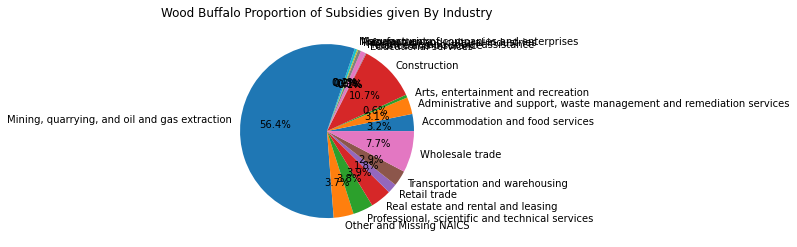

In [42]:
import matplotlib.pyplot as plt

temp = cews.query("GeoAggregation == 'CMA/CA' and IndustryAggregation == 'Level 1' and Region == 'Wood Buffalo'")
# Note that some values are supressed
temp = temp.dropna().groupby("Industry").sum().reset_index()
temp

plt.pie(temp["Subsidy"], labels = temp["Industry"], autopct = '%1.1f%%')
plt.title("Wood Buffalo Proportion of Subsidies given By Industry")
#plt.savefig("WBSubByInd.png")

We see that in Wood Buffalo, over half of the total subsidies went to miniing/ oil and gas.

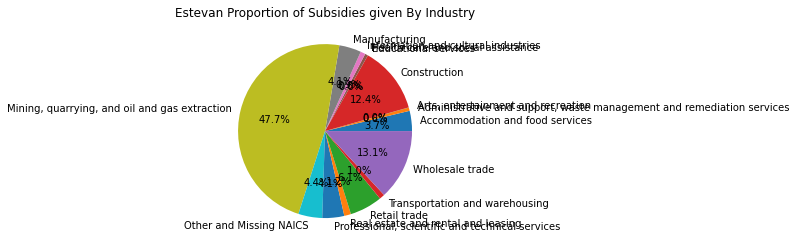

In [44]:
temp = cews.query("GeoAggregation == 'CMA/CA' and IndustryAggregation == 'Level 1' and Region == 'Estevan'")
temp = temp.dropna().groupby("Industry").sum().reset_index()
plt.pie(temp["Subsidy"], labels = temp["Industry"], autopct = '%1.1f%%')
plt.title("Estevan Proportion of Subsidies given By Industry")
#plt.savefig("ESubByInd.png")

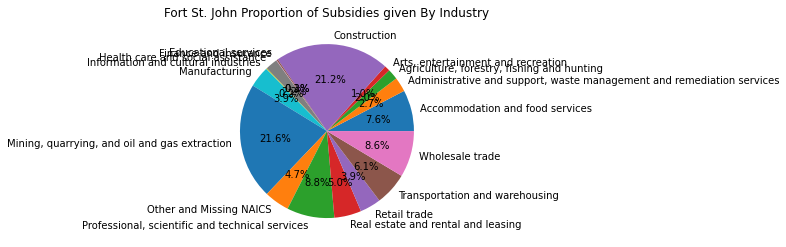

In [46]:
temp = cews.query("GeoAggregation == 'CMA/CA' and IndustryAggregation == 'Level 1' and Region == 'Fort St. John'")
temp = temp.dropna().groupby("Industry").sum().reset_index()
plt.pie(temp["Subsidy"], labels = temp["Industry"], autopct = '%1.1f%%')
plt.title("Fort St. John Proportion of Subsidies given By Industry")
#plt.savefig("FSJSubByInd.png")

The story is similar in Estevan, with almost half of subsidies going ot oil and gas. Fort St. John was different. While mining/ oil and gas was still the most sudsidized industry, it has a smaller slice than in the other two cities. 

It is interesting to note that the mining, quarrying, oil and gas industry recieved a relatively small amount of subsidy compared to other industries, coming in 12th of 19 for most subsidized industries. 

# Part 7: Most Subsidized Industries in each of the ten most subsidized CA/CMA's per population

In [50]:
temp6 = popByCity.query("StatEn == 'Count' and SexEn == 'Both sexes'")
temp6
temp5 = cews.query("GeoAggregation == 'CMA/CA' and IndustryAggregation == 'All industries'").groupby("Region").sum().reset_index()

temp6 = temp5.merge(temp6, how = "left", left_on = "Region", right_on = "GeoNameEn")

temp6["SubsidyPerPerson"] = temp6["Subsidy"] / temp6["AgeTot"]

temp6 = temp6.sort_values("SubsidyPerPerson").tail(10)

# Pull out the names of the ten most subsidized regions 
mostSubsidized = temp6["Region"]

# Find level 1 industry rows for towns in our most subsidized list
temp = cews[cews["Region"].isin(mostSubsidized)].query("GeoAggregation == 'CMA/CA' and IndustryAggregation == 'Level 1'")
temp = temp.groupby(["Region", "Industry"]).sum().reset_index()
# Finds the max subsidy given in each city
temp = temp[temp["Subsidy"] == temp.groupby("Region")["Subsidy"].transform(max)]

alt.Chart(temp, title = "Most Subsidized Industry in the Ten Most Subsidized CMA/CA's per Person").mark_bar().encode(
    x = "Subsidy",
    y = "Region",
    # Most subsidized industry
    color = "Industry"
)

alt.Chart(...)

In the top ten most subsidized CA/CMA's, the most subsidized industry is either Manufacturing, Mining, or Construction. 

# Part 8: What is the Most Heavily Subsidized Industry Within Each Province/ Territory? 

In [51]:
temp = cews.query("GeoAggregation == 'Province' and IndustryAggregation == 'Level 1'")
temp = temp.groupby(["Region", "Industry"]).sum().reset_index()

temp = temp[temp["Subsidy"] == temp.groupby("Region")["Subsidy"].transform(max)]

alt.Chart(temp).mark_bar().encode(
    x = "Subsidy",
    y = "Region",
    color = "Industry"
)

alt.Chart(...)

British Columbia is the only province with "Accomidation and food services" as it's top subsidized industry. This is likely due to the importance of tourism for BC, especially over the summer months. 

# Part 9: BC's Tourism Industry

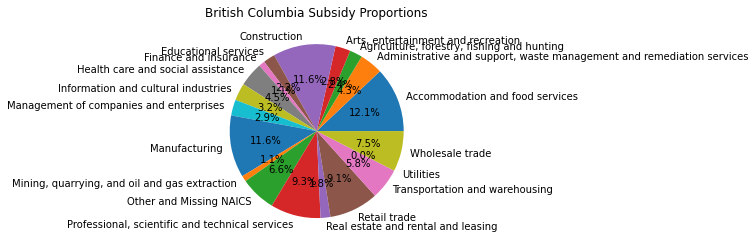

In [55]:
temp = cews.query("GeoAggregation == 'Province' and IndustryAggregation == 'Level 1' and Region == 'British Columbia'")
temp = temp.groupby("Industry").sum().reset_index()

plt.pie(temp["Subsidy"], labels = temp["Industry"], autopct = '%1.1f%%')
plt.title("British Columbia Subsidy Proportions")
#plt.savefig("BCSubByInd.png")

Let's break down the accomidations industry to see the subsets of that 

In [57]:
temp = cews.query("GeoAggregation == 'Province' and IndustryAggregation == 'Level 2' and Region == 'British Columbia'")
# Filter for anythin within this particular industry
temp = temp[temp["IndustryCode"].str.match("^72\d$")]

alt.Chart(temp, title = "Accomidation and Food Service Subsidies over Time in BC").mark_line().encode(
    x = "Period",
    y = "Subsidy",
    color = "Industry"
)

alt.Chart(...)

We see that both of these subindustries were hit particularly hard over the summer months, with peaks in June/July. This is not consistent with the overall subsidies, which saw the highest numbers in April and May.

We can study the areas in BC that are most reliant on the accomidation and food service industry:

In [59]:
temp = cews.query("GeoAggregation == 'CMA/CA' and IndustryCode == '72'")
# Match any region in BC
temp = temp[temp["RegionCode"].str.match("^59")]
temp = temp.dropna().groupby("Region").sum().sort_values(by = "Subsidy").reset_index()

temp2 = popByCity.query("StatEn == 'Count' and SexEn == 'Both sexes'")

temp = temp.merge(temp2, how = "left", left_on = "Region", right_on = "GeoNameEn")

temp["SubPerPerson"] = temp["Subsidy"] / temp["AgeTot"]

alt.Chart(temp, title = "Food and Accomidation Subsidies given Per Resident in Each BC CMA/CA").mark_bar().encode(
    x = "SubPerPerson",
    y = "Region"
)

alt.Chart(...)

# Part 10: Rural/ Urban Split

In [61]:
temp = cews.query("GeoAggregation == 'urban/rural by country' and IndustryAggregation == 'All industries'")

bars = alt.Chart(temp).mark_bar().encode(
    y=alt.Y('Period'),
    x= alt.X('Subsidy' ,stack="zero"),
    color='RegionCode'
)

# text = alt.Chart(temp).mark_text(dx=-40, dy=3, color='black').encode(
#     y=alt.Y('Period'),
#     x=alt.X('Subsidy', stack = "zero"),
#     detail='RegionCode',
#     text=alt.Text('Subsidy', format='.1f')
# )

bars #+ text

alt.Chart(...)

In [63]:
temp = cews.query("GeoAggregation == 'urban/rural by province' and IndustryAggregation == 'All industries'")
temp = temp.groupby(["Region", "GeographicClassification"]).sum().reset_index()

# Takes only characters up until ' -', to return just the province name without the "rural/urban part"
for i in range(len(temp)):
    temp["Region"][i] = temp["Region"][i][0:temp["Region"][i].find(' -')]
temp

alt.Chart(temp).mark_bar().encode(
    y = alt.Y("Region"),
    x = alt.X("Subsidy"),
    color = "GeographicClassification"
)

<ipython-input-63-0d39f288e02b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["Region"][i] = temp["Region"][i][0:temp["Region"][i].find(' -')]


alt.Chart(...)

In [64]:
alt.Chart(temp).mark_bar().encode(
    y = alt.Y("Region"),
    x = alt.X("Subsidy", stack = "normalize"),
    color = "GeographicClassification"
)

alt.Chart(...)

# Part 11: Proportion of Businesses in each city recieving subsidies

In [80]:
temp = cews.query("GeoAggregation == 'Province' and IndustryAggregation == 'All industries'")
businessByProv = pd.read_csv("more_data/businessCountByProv.csv")
# There is a row which has the number for all of Canada
businessByProv = businessByProv.query("Region != 'Canada'")

temp = businessByProv.merge(temp, how = 'left', on = "Region")

temp["numBusinesses"] = temp["numBusinesses"].replace(',', '', regex=True).astype(np.float)
temp["ProportionBusinesses"] = temp["BusinessLocations"] / temp["numBusinesses"]

# # Extract first two digits of the region code for the province
# temp["Province"] = temp["RegionCode"].str.extract(r'(^\d{2})')

alt.Chart(temp, title = "Proportion of Businesses Recieving Subsidies in Each Province").mark_point().encode(
    x = "Period",
    y = "ProportionBusinesses",
    color = "Region",
)

alt.Chart(...)

In [82]:
# Proportion of total businesses subsidized in each Province over the May period
temp2 = temp.query("Period == '2020-05-10'")

#temp2["Province"] = temp2["RegionCode"].str.extract(r'(^\d{2})')

alt.Chart(temp2, title = "Proportion of Businesses who Recieved a Subsidy in Each CMA in May").mark_bar().encode(
    x = "ProportionBusinesses",
    y = "Region",
    color = "Region"
)

alt.Chart(...)

In [84]:
businessByCity = pd.read_csv("more_data/businessCountByCMA.csv")
# These Datasets have the same metropolitan areas, but the cews data splits Ottawa-Gatineau 
# into Ontario and Quebec separately while teh business count dataset does not
len(set(businessByCity["Region"]))
temp = cews.query("CensusLevel == 'CMA' and IndustryAggregation == 'All industries'")
ottawa = temp[temp["Region"] == "Ottawa - Gatineau (Ontario part)"].append(temp[temp["Region"] == "Ottawa - Gatineau (Quebec part)"])
ottawa = ottawa.groupby("Period").sum().reset_index()
ottawa["Region"] = "Ottawa - Gatineau"
ottawa["RegionCode"] = "35505"
ottawa["IndustryCode"] = "TOTAL"
ottawa["Industry"] = "All Industries"
ottawa["CensusLevel"] = "CMA"
ottawa["GeoAggregation"] = "CMA/CA"
ottawa["IndustryAggregation"] = "All industries"
ottawa["GeographicClassification"] = "URBAN"
temp = temp.append(ottawa)
businessByCity

temp = businessByCity.merge(temp, how = 'left', on = "Region")

temp["numBusinesses"] = temp["numBusinesses"].replace(',', '', regex=True).astype(np.float)
temp["ProportionBusinesses"] = temp["BusinessLocations"] / temp["numBusinesses"]

# Extract first two digits of the region code for the province
temp["Province"] = temp["RegionCode"].str.extract(r'(^\d{2})')

alt.Chart(temp, title = "Proportion of Businesses Recieving Subsidies in Each CMA").mark_point().encode(
    x = "Period",
    y = "ProportionBusinesses",
    color = "Province",
)

alt.Chart(...)

In [85]:
# Proportion of total businesses subsidized in each CMA over the May period

temp2 = temp.query("Period == '2020-05-10'")

temp2["Province"] = temp2["RegionCode"].str.extract(r'(^\d{2})')

alt.Chart(temp2, title = "Proportion of Businesses who Recieved a Subsidy in Each CMA in May").mark_bar().encode(
    x = "ProportionBusinesses",
    y = "Region",
    color = "Province"
)

<ipython-input-85-117b80984ad0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp2["Province"] = temp2["RegionCode"].str.extract(r'(^\d{2})')


alt.Chart(...)

- Quebec cities have the highest proportion of subsidized businesses
- BC has the lowest proportion

# Part 12: Most heavily Subsidized rural areas

We see tourist towns were hit hard, especially in accomidation and food service and retail.

In [145]:
temp = cews.query("GeographicClassification == 'RURAL' and GeoAggregation == 'CSD' and IndustryAggregation == 'Level 1'").\
    groupby(["Region", "Industry"]).sum().sort_values("BusinessLocations").sort_values("Subsidy").tail(10).reset_index()

alt.Chart(temp, title = "10 largest subsidies Given to Rural Communities (CSD)").mark_bar().encode(
    x = "Subsidy",
    y = "Region",
    color = "Industry"
)

alt.Chart(...)

In [146]:
temp = cews.query("GeoAggregation == 'CSD' and IndustryAggregation == 'Level 1'").\
    groupby(["Region", "Industry"]).sum().sort_values("BusinessLocations").sort_values("Subsidy").tail(10).reset_index()

alt.Chart(temp, title = "10 largest subsidies Given to Urban Communities (CSD)").mark_bar().encode(
    x = "Subsidy",
    y = "Region",
    color = "Industry"
)

alt.Chart(...)

In [178]:
# # THis is not currently working

# temp = cews.query("GeographicClassification == 'RURAL' and GeoAggregation == 'CSD' and IndustryAggregation == 'Level 1'")

# # Pull out industry code and industry name

# businessByCSD = pd.read_csv("more_data/businessCountByCSD.csv")
# s = businessByCSD["North American Industry Classification System (NAICS)"]
# businessByCSD["IndustryCode"] = s.apply(lambda x: x[x.find("[")+1:x.find("]")])
# businessByCSD["Industry"] = s.apply(lambda x: x[: x.find("[")])
# temp = temp.merge(businessByCSD, how = "inner", left_on = ["Region", "IndustryCode"], right_on = ["GEO", "IndustryCode"])
# temp["PropBusinesses"] = temp["BusinessLocations"] / temp["VALUE"]
# temp.sort_values("PropBusinesses").tail(20)

# Part 13: Science in Toronto

The single most subsidized industry on the CSD scale was "Profesional, scientific, and technical" in Toronto. We shall explore this a bit. 

In [156]:
temp = cews.query("GeoAggregation == 'CSD' and IndustryAggregation == 'Level 1' and Region == 'Toronto'").sort_values("Subsidy", ascending = False)

alt.Chart(temp.head(10), title = "Ten Largest Subsidies Given in the Toronto Census Subdivision").mark_point().encode(
    x = "Period",
    y = "Subsidy",
    color = "Industry"
)

alt.Chart(...)

All ten of the largest subsidies given in Toronto are in either Manufacturing (31-33) or Professional, Scientific and Technical (54).

In [164]:
temp = cews.query("IndustryAggregation == 'Level 2' and GeoAggregation == 'CSD' and Region == 'Toronto'").sort_values("Subsidy", ascending = False)

alt.Chart(temp.head(10), title = "Ten Largest Subsidies Given in the Toronto Census Subdivision (Level 2 Industries)").mark_point().encode(
    x = "Period",
    y = "Subsidy",
    color = "Industry"
)


alt.Chart(...)

However, when we look at the more specific level 2 industries, the ten largest subsidies are food services and drinking places (722) or Administrative and support services (561). Neither of these industries are contained in the level 1 industries discussed above.

Text(0.5, 1.0, 'Subsidy Alllotment in the Toronto CSD for Level 1 Industries')

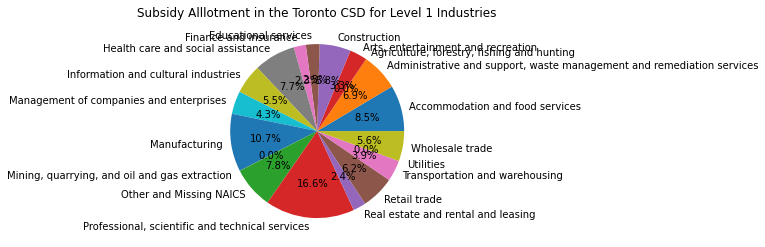

In [169]:
temp = cews.query("GeoAggregation == 'CSD' and IndustryAggregation == 'Level 1' and Region == 'Toronto'").sort_values("Subsidy", ascending = False)
temp = temp.groupby("Industry").sum().reset_index()

plt.pie(temp["Subsidy"], labels = temp["Industry"], autopct = '%1.1f%%')
plt.title("Subsidy Alllotment in the Toronto CSD for Level 1 Industries")

We may want to look deeper into the science and manufacturing sectors to see the proportions given for each

In [179]:
temp = cews.query("GeoAggregation == 'CSD' and IndustryAggregation == 'Level 2' and Region == 'Toronto'")
temp["Level1"] = temp["IndustryCode"].str.extract(r'(^\d{2})')
temp.query("Level1 == '11'")
#.sort_values("Subsidy", ascending = False)

<ipython-input-179-1728458da8a8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["Level1"] = temp["IndustryCode"].str.extract(r'(^\d{2})')


,Period,RegionCode,Region,GeographicClassification,CensusLevel,IndustryCode,Industry,BusinessLocations,Subsidy,SupportedEmployees,RehiredEmployees,GeoAggregation,IndustryAggregation,Level1
33775,2020-03-15,3520005,Toronto,URBAN,Not applicable,111,Crop production,10.0,NaN,73.0,0.0,CSD,Level 2,11
33776,2020-03-15,3520005,Toronto,URBAN,Not applicable,112,Animal production and aquaculture,5.0,NaN,NaN,0.0,CSD,Level 2,11
33777,2020-03-15,3520005,Toronto,URBAN,Not applicable,113,Forestry and logging,0.0,NaN,NaN,0.0,CSD,Level 2,11
33778,2020-03-15,3520005,Toronto,URBAN,Not applicable,115,Support activities for agriculture and forestry,5.0,168000.0,60.0,0.0,CSD,Level 2,11
108796,2020-04-12,3520005,Toronto,URBAN,Not applicable,111,Crop production,10.0,127000.0,62.0,0.0,CSD,Level 2,11
108797,2020-04-12,3520005,Toronto,URBAN,Not applicable,112,Animal production and aquaculture,5.0,NaN,NaN,0.0,CSD,Level 2,11
108798,2020-04-12,3520005,Toronto,URBAN,Not applicable,113,Forestry and logging,0.0,NaN,NaN,0.0,CSD,Level 2,11
108799,2020-04-12,3520005,Toronto,URBAN,Not applicable,115,Support activities for agriculture and forestry,5.0,NaN,41.0,0.0,CSD,Level 2,11
186505,2020-05-10,3520005,Toronto,URBAN,Not applicable,111,Crop production,10.0,124000.0,56.0,5.0,CSD,Level 2,11
186506,2020-05-10,3520005,Toronto,URBAN,Not applicable,112,Animal production and aquaculture,5.0,NaN,NaN,0.0,CSD,Level 2,11


In [187]:
#cews.query("GeoAggregation == 'urban/rural by province' and GeographicClassification == 'RURAL' and IndustryAggregation == 'All industries'")